# Modelo de aprendizado de máquina para predição de hemoglobina glicada

Diabetes Mellitus (DM) é uma doença crônica que vem ganhando cada vez mais notoriedade devido ao aumento da taxa de incidência nos últimos anos. Muitas pesquisas vem se desenvolvendo ao longo dos anos com os mais diversos focos, indo desde a escolha de características para treinar modelos de inteligência artificial até a análise de uma população especifica no mundo. Investigamos um problema de classificar indivíduos saudáveis de indivíduos com diabetes em diferentes níveis de glicose no sangue usando 5 algoritmos de aprendizado de máquina distintos. Nossos resultados mostraram que o algoritmo Gradient Boosting obteve um score maior que os demais, de aproximadamente 82%, porém sendo prejudicado na classificação de DM com níveis de glicose maiores devido a limpeza de _outliers_ por Interquartile Range (IQR).

- Discente: Álvaro Ferreira Pires de Paiva (20211028885)

# Conjunto de dados

O conjunto de dados (dataset) escolhida foi a "[Synthetic Continuous Glucose Monitoring (CGM) Signals](https://data.mendeley.com/datasets/chd8hx65r4/2)" que encontrasse em sua segunda versão. São dados gerados a partir de Rede Adversarial Gerativa Condicional (_Conditional Generative Adversarial Network_, CGAN) e contém sinais semelhantes a pessoas com diabetes tipo 1 e indivíduos saudáveis.

As linhas representam dias e as colunas representam registros de glicose, com exceção da primeira coluna que representa a classe do paciente. Temos um total de 4 classes bem distribuídas na base de dados:

| Classe | Descrição |
| ------ | --------- |
| 1 | Abaixo de $6,5\%$ (saudável sem diabetes) |
| 2 | Entre $6,5\%$ a $< 7\%$ |
| 3 | Entre $7\%$ a $< 8\%$ |
| 4 | Igual ou superior a $8\%$ |

Para se ter uma melhor perspectiva, a seguir consta os valores em um âmbito mais geral:

| Hemoglobina glicada | Descrição |
| ----- | --------- |
| $4.5\% < 5.6\%$ | Saudável sem diabetes |
| $5.6\% < 6.5\%$ | Pré-diabetes |
| $>=6.5\%$ | Diabetes |


In [ ]:
import pandas as pd

In [ ]:
# Como o dataset não possuí colunas, temos que criá-las
measurement_cols = [f'measurement_{number+1}' for number in range(288)]
columns = ['class'] + measurement_cols

In [ ]:
df = pd.read_csv('db.csv', names=columns)

Agora podemos analisar um pouco mais o dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 289 entries, class to measurement_288
dtypes: float64(288), int64(1)
memory usage: 88.2 MB


A coluna `class` é do tipo `int64`, as colunas restantes são do tipo `float64`. Temos um total de 40 mil dias, cada um com 288 registros de glicose.

In [ ]:
df.head()

,class,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,...,measurement_279,measurement_280,measurement_281,measurement_282,measurement_283,measurement_284,measurement_285,measurement_286,measurement_287,measurement_288
0,1,94.352969,94.509436,97.896045,94.362186,89.904092,87.304958,86.648854,84.987576,83.852965,...,78.850555,80.846356,79.268661,77.859814,77.424086,83.057918,90.862989,97.747566,103.617019,103.093125
1,1,98.762648,99.091355,101.492143,99.764835,98.640691,98.054781,98.583547,99.392618,100.762824,...,107.341155,108.199508,109.281685,111.111827,116.216097,124.092003,129.809676,136.526853,140.726914,142.018711
2,1,96.156692,95.372958,97.367643,95.716407,92.659870,89.719935,88.394252,88.168338,85.667331,...,104.070894,106.450605,106.013283,102.546387,99.433642,97.194998,98.027391,99.155243,100.845724,100.949022
3,1,110.392003,108.136949,109.917804,108.190053,107.669154,106.529160,107.867989,113.102050,117.582492,...,93.840069,93.938335,93.002812,90.003672,87.649985,89.594254,93.307359,97.171641,100.673994,102.250196
4,1,102.043255,101.077085,104.395160,102.207074,99.174181,97.888853,98.155557,99.490052,100.483017,...,80.122782,81.044636,79.138550,77.022219,79.272910,84.160145,91.969029,97.543302,101.413018,103.015490


In [ ]:
df.groupby('class').count()['measurement_1']

class
1    10000
2    10000
3    10000
4    10000
Name: measurement_1, dtype: int64

Podemos ver que todas as classes são bem distribuidas, cada uma com mil registros.

# Exploratory Data Analysis (EDA)

In [ ]:
print(f'Valor máximo: {df[measurement_cols].max().max()}')
print(f'Valor mínimo: {df[measurement_cols].min().min()}')

Valor máximo: 596.184034162574
Valor mínimo: -24.9191363941792


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Layout padrão
default_layout = (3,4)
# Figsize padrão
default_figsize = (10,6)

def plot_density(df):
  """Plota o gráfico de densidade.
  """
  df.plot(kind="density",
          subplots=True,
          sharex=False,
          layout=default_layout,
          figsize=default_figsize)
  plt.tight_layout()
  plt.show()

def plot_box(df):
  """Plota o boxplot.
  """
  df.plot(kind="box",
          subplots=True,
          sharex=False,
          layout=default_layout,
          figsize=default_figsize)
  plt.tight_layout()
  plt.show()
  
def print_eda(df):
  """Mostra gráficos e valores relacionados a etapa de
  Exploratory Data Analysis (EDA)."""
  hr = '--------------------------------------------------------------'
  print("Density")
  plot_density(df)

  print(hr)
  print("Box")
  plot_box(df)

  print(hr)
  print("Correlação")
  print(df.corr()['class'].sort_values())

  print(hr)
  print("Heatmap")
  sns.heatmap(df.corr())

Density


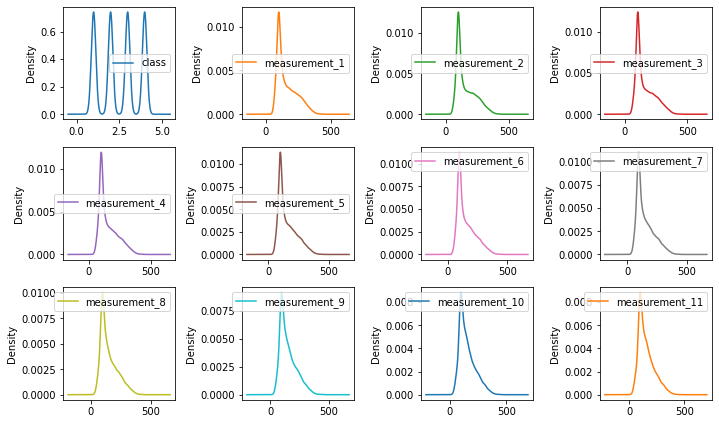

--------------------------------------------------------------
Box


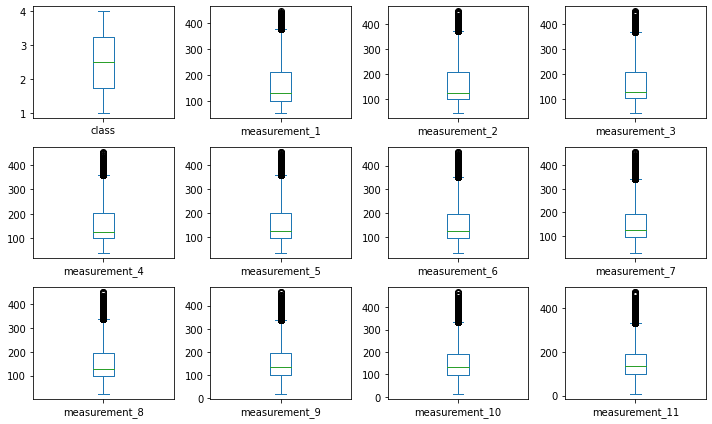

--------------------------------------------------------------
Correlação
measurement_7     0.422640
measurement_8     0.423210
measurement_5     0.423446
measurement_6     0.423664
measurement_11    0.424574
measurement_4     0.426455
measurement_9     0.428353
measurement_10    0.428422
measurement_3     0.432845
measurement_2     0.437526
measurement_1     0.448080
class             1.000000
Name: class, dtype: float64
--------------------------------------------------------------
Heatmap


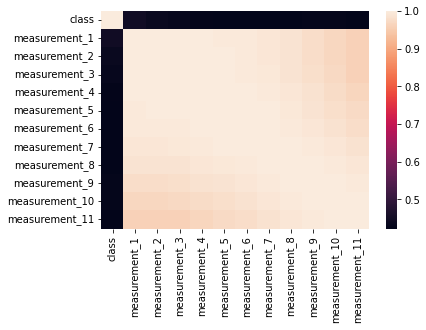

In [ ]:
print_eda(df[columns[:12]])

## Limpando outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def clean_outliers(data):
  """Essa função limpa os outliers usando IQR.
  
  Return: df
    O dataframe com os outliers tratados.
  """
  df = data.copy()
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  low = Q1 - 1.5 * IQR
  up = Q3 + 1.5 * IQR
  df = df[((df > low).all(axis=1) & (df < up).all(axis=1))]
  return df

In [ ]:
df_normalized = df.copy()

# Normalizando os dados
df_normalized = MinMaxScaler().fit_transform(df_normalized)
# Criamos um novo DataFrame com os dados normalizados
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
# Colocamos a coluna de classe para o seu valor real
df_normalized['class'] = df['class']

df_iqr = clean_outliers(df_normalized)

Density


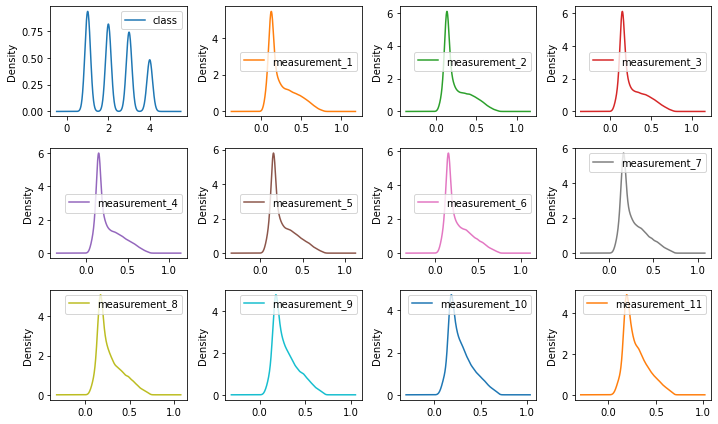

--------------------------------------------------------------
Box


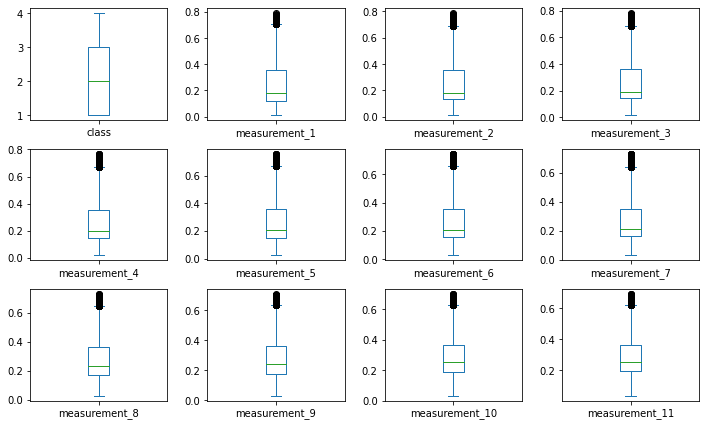

--------------------------------------------------------------
Correlação
measurement_5     0.466298
measurement_6     0.467789
measurement_4     0.468271
measurement_7     0.468791
measurement_8     0.470737
measurement_3     0.473964
measurement_11    0.475874
measurement_9     0.478449
measurement_10    0.479379
measurement_2     0.479519
measurement_1     0.492360
class             1.000000
Name: class, dtype: float64
--------------------------------------------------------------
Heatmap


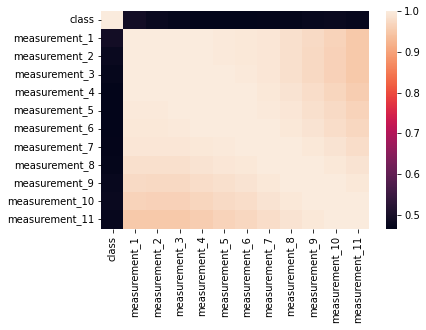

In [ ]:
print_eda(df_iqr[columns[:12]])

# Modelos

Como trata-se de um problema com multi classes, escolhi os seguintes algoritmos para usar:

- K-Nearest Neighbors;
- Decision Trees;
- Naive Bayes;
- Random Forest;
- Gradient Boosting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
training_data = {
    'decision tree': {
        'class': DecisionTreeClassifier,
        'params': {
          'random_state': 0,
        },
    },
    'gradient boosting': {
        'class': GradientBoostingClassifier,
        'params': {
          'n_estimators': 100,
          'learning_rate': 1.0,
          'max_depth': 1,
          'random_state': 0,
        },
    },
    'k-neighbors': {
        'class': KNeighborsClassifier,
        'params': {
          'n_neighbors': 13,
        },
    },
    'naive bayes': {
        'class': GaussianNB,
        'params': {},
    },
    'random forest': {
        'class': RandomForestClassifier,
        'params': {
            'max_depth': 2,
            'random_state': 0,
        },
    },
}

## Dados de treinamento

In [ ]:
from sklearn.model_selection import train_test_split

## Treinamento

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
dfs = {
  'root': df,
  'normalized': df_normalized,
  'iqr': df_iqr,
}
models = {
  'root': {},
  'normalized': {},
  'iqr': {},
}

In [ ]:
for df_key in dfs.keys():
  print(f'=== {df_key} ===')
  data = dfs[df_key]

  # Training data
  X = data[measurement_cols]
  y = data['class']
  X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42
  )

  # Training
  for model_name in training_data.keys():
    model_data = training_data[model_name]
    classifier = model_data['class'](**model_data['params'])
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    models[df_key][model_name] = {
        'classifier': classifier,
        'confusion_matrix': confusion_matrix(classifier.predict(X_test), y_test),
    }
    print(f'({df_key}) {model_name}: {score}')

=== root ===
(root) decision tree: 0.7001666666666667
(root) gradient boosting: 0.815
(root) k-neighbors: 0.7234166666666667
(root) naive bayes: 0.6639166666666667
(root) random forest: 0.5993333333333334
=== normalized ===
(normalized) decision tree: 0.7001666666666667
(normalized) gradient boosting: 0.8151666666666667
(normalized) k-neighbors: 0.7256666666666667
(normalized) naive bayes: 0.6639166666666667
(normalized) random forest: 0.5993333333333334
=== iqr ===
(iqr) decision tree: 0.696585672392124
(iqr) gradient boosting: 0.8265605362379556
(iqr) k-neighbors: 0.7358609132802681
(iqr) naive bayes: 0.6984708839547549
(iqr) random forest: 0.6402387934645999


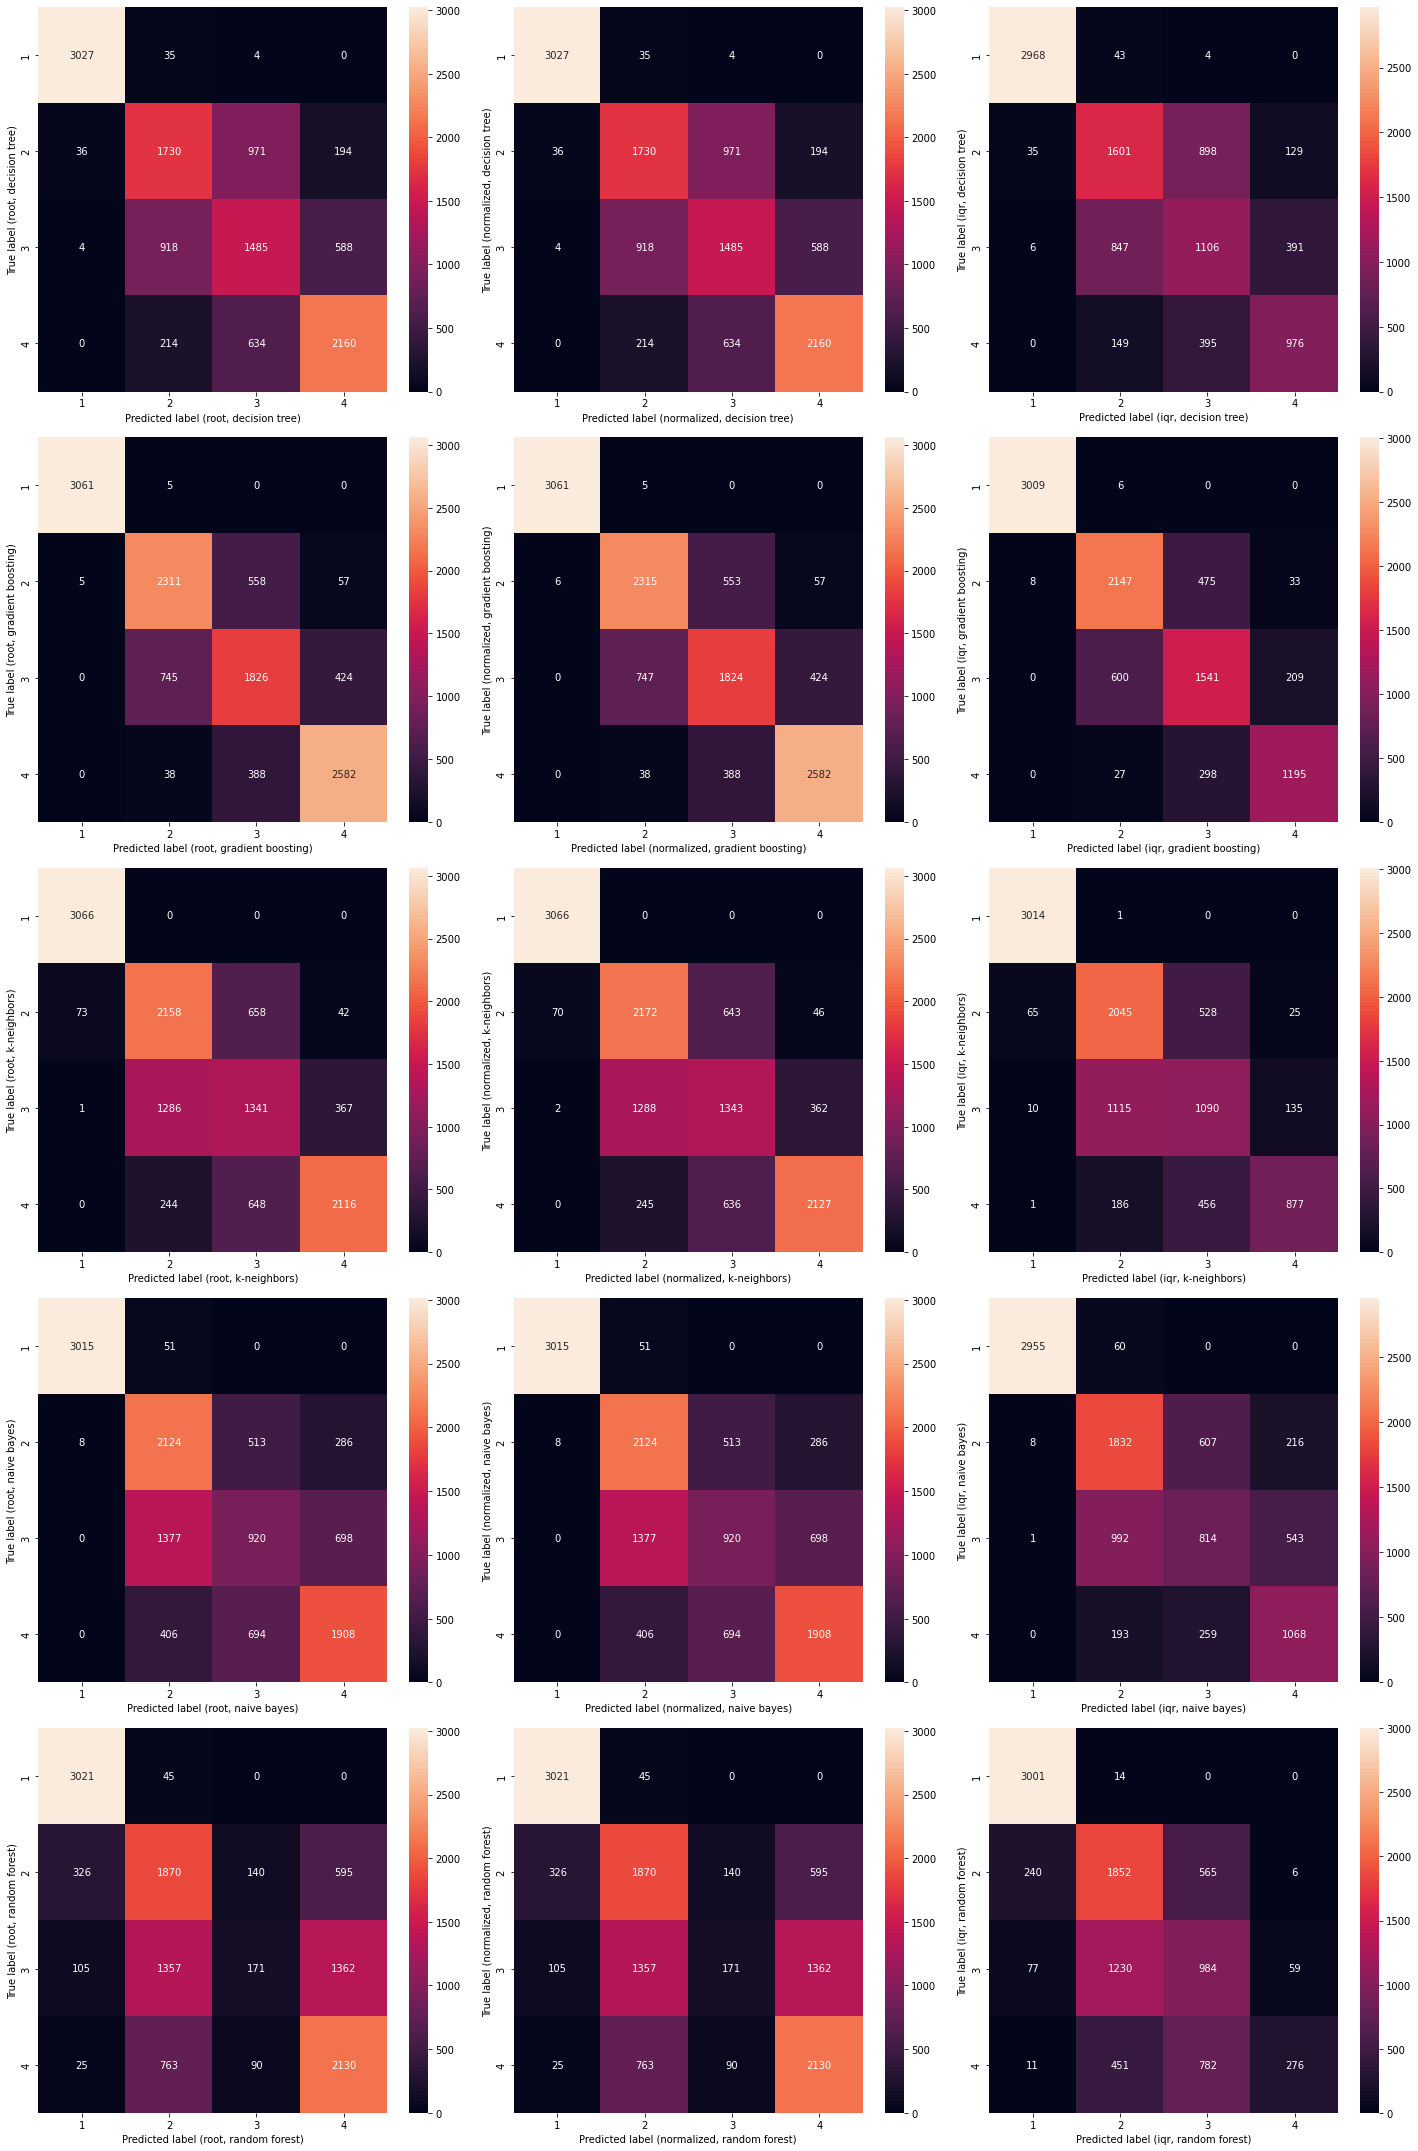

In [ ]:
labels = [1, 2, 3, 4]
trainings_key = models.keys()
fig, axes = plt.subplots(
    nrows=len(models['iqr'].keys()),
    ncols=len(trainings_key),
    figsize=(20, 30),
)
row = 0

for model_key in models['iqr'].keys():
  col = 0
  for training_key in trainings_key:
    labels = [1, 2, 3, 4]
    confusion_matrix_data = models[training_key][model_key]['confusion_matrix']

    chart = sns.heatmap(
        np.transpose(confusion_matrix_data),
        annot=True,
        fmt='d',
        xticklabels=labels,
        yticklabels=labels,
        ax=axes[row][col],
    ).set(
        xlabel=f'Predicted label ({training_key}, {model_key})',
        ylabel=f'True label ({training_key}, {model_key})',
    )
    col += 1
  row += 1

fig.tight_layout()